<a href="https://colab.research.google.com/github/shuvayanb/LFF-for-design-and-optimisation/blob/main/LFF_Scramjet_intake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/shuvayanb/files_folders/main/scramjet_layout.png)

In [1]:
import numpy as np
import math

In [2]:
M1 = 8           # Freestream Mach number
Me = 0.75*M1      # Mach number after last external shock
#Mis = 0.5*M1   # Mach number at the start of the isolator
P1 = 6079.5      # Freestream Pressure
T1 = 230.0       # Freestream Temperature
R = 287.0 
rho1 = P1/(R*T1) # Freestream density
gamma_Y = 1.4;   # Ratio of specific heats

V1 = M1*np.sqrt(gamma_Y*R*T1);

H = 0.1          # Height of cowl lip
Lmax = 1.0       # Length of forebody

tol = 1e-03;
error = 100.0;

n = 2            # Number of external shocks
m = 2            # Number of internal shocks 

SPR_guess = 0.001 # Initial guess Static Pressure Ratio

beta = [0 for i in range(n+m+1)]
theta = [0 for i in range(n+m+1)]
gam = [0 for i in range(n+m+1)]
si = [0 for i in range(n+m+2)]
M = [0 for i in range(n+m+1)]
P = [0 for i in range(n+m+1)]
T = [0 for i in range(n+m+1)]
rho = [0 for i in range(n+m+1)]

M[0] = M1         # Freestream Mach number
P[0] = P1         # Freestream Pressure
T[0] = T1         # Freestream Temparature
rho[0] = rho1     # Freestream density    

beta[0] = None 
theta[0] = None
gam[0] = None
si[0] = None 

In [3]:
while(error>tol):

    for i in range(0, n, 1): #***************External Shocks*****************//

        beta[i+1] = math.asin( np.sqrt(( ((SPR_guess-1.0)*((gamma_Y+1)/(2*gamma_Y))) + 1)/(M[i]*M[i])))

        theta[i+1] = math.atan((2*np.cos(beta[i+1])*(M[i]*M[i]*np.sin(beta[i+1])*np.sin(beta[i+1])-1))/(np.sin(beta[i+1])*(M[i]*M[i]*(gamma_Y+np.cos(2*beta[i+1]))+2)))

        M[i+1] = ((np.sqrt((M[i]*M[i]*pow(np.sin(beta[i+1]),2)+(2/(gamma_Y-1)))/ (((2*gamma_Y*M[i]*M[i]*pow(np.sin(beta[i+1]),2)/(gamma_Y-1))-1)))) / np.sin(beta[i+1]-theta[i+1]))

        P[i+1] = (P[i] * (1 + ( ((2*gamma_Y)/(gamma_Y+1)) * (pow(M[i]*np.sin(beta[i+1]),2) -1)  )))

        rho[i+1] = rho[i] * ( ((gamma_Y+1)*M[i]*M[i]*np.sin(beta[i+1])*np.sin(beta[i+1])) / (((gamma_Y-1)*M[i]*M[i]*np.sin(beta[i+1])*np.sin(beta[i+1])) + 2)  )

        T[i+1] = T[i] * (P[i+1]/P[i]) * (rho[i]/rho[i+1])

        #gam[i+1] = beta[i+1] + theta[i+1]

        #si[i+1] = gam[i+1] - beta[i+1]


        if i==0:
            gam[i+1] = beta[i+1]
            si[i+1] = 0.0


        elif i>0:
            gam[i+1] = beta[i+1] + theta[i] + si[i]
            si[i+1] = gam[i+1] - beta[i+1]


    SPR_guess = SPR_guess + 0.001

    error = abs(Me-M[n])
    
sum_ext=0

for i in range(0, n, 1):

    sum_ext+=theta[i+1]


ext_guess_PR = SPR_guess - 0.001

error = 100.0

SPR_guess = 0.001

temp = 0.0


while(error>tol):

    for i in range(0, m, 1): #***************Internal Shocks*****************//
         
        beta[n+i+1] = math.asin( np.sqrt(( ((SPR_guess-1.0)*((gamma_Y+1)/(2*gamma_Y))) + 1)/(M[n+i]*M[n+i])))

        theta[n+i+1] = math.atan((2*np.cos(beta[n+i+1])*(M[n+i]*M[n+i]*np.sin(beta[n+i+1])*np.sin(beta[n+i+1])-1))/(np.sin(beta[n+i+1])*(M[n+i]*M[n+i]*(gamma_Y+np.cos(2*beta[n+i+1]))+2)))

        M[n+i+1] = (np.sqrt((M[n+i]*M[n+i]*pow(np.sin(beta[n+i+1]),2)+(2/(gamma_Y-1)))/ (((2*gamma_Y*M[n+i]*M[n+i]*pow(np.sin(beta[n+i+1]),2)/(gamma_Y-1))-1)))) / np.sin(beta[n+i+1]-theta[n+i+1] )

        P[n+i+1] = P[n+i] * (1 + ( ((2*gamma_Y)/(gamma_Y+1)) * (pow(M[n+i]*np.sin(beta[n+i+1]),2) -1)  ))

        rho[n+i+1] = rho[n+i] * (  ((gamma_Y+1)*M[n+i]*M[n+i]*np.sin(beta[n+i+1])*np.sin(beta[n+i+1])) / (((gamma_Y-1)*M[n+i]*M[n+i]*np.sin(beta[n+i+1])*np.sin(beta[n+i+1])) + 2)  )

        T[n+i+1] = T[n+i] * (P[n+i+1]/P[n+i]) * (rho[n+i]/rho[n+i+1])


    sum_int=0;

    for i in range(0, m, 1):
        sum_int+=theta[n+i+1]
    
    si[n+m+1] = 0

    for i in range(m, 0, -1):

        si[n+i] = si[n+i+1] + theta[n+i]
        gam[n+i] = beta[n+i] - si[n+i]
        
    

    SPR_guess = SPR_guess + 0.001

    error = abs(sum_ext-sum_int)

int_guess_PR = SPR_guess - 0.001;

#print([si[-1],gam[-1],M[-1],T[-1],P[-1]])
#print(si)
#print(gam)


In [4]:
#Scramjet shape
 
#***************** Trigonometric calculations ********************

import os

file_ex = "external_shocks.dat"

file_in = "internal_shocks.dat"

file_ramp = "ramp_geo.dat"


if os.path.exists(file_ex):
    os.remove(file_ex)
    
if os.path.exists(file_in):
    os.remove(file_in)
   
if os.path.exists(file_ramp):
    os.remove(file_ramp)
    

myfile_ex = open(file_ex, 'a')
myfile_in = open(file_in, 'a')
myfile_ramp = open(file_ramp, 'a')
              

X = [0 for i in range(n+m+1)]
Y = [0 for i in range(n+m+1)]

X[n+1] = 0
Y[n+1] = 0

y = 0.0;
x = 0.0;

X[0] = 0.0;
Y[0] = 0.0;


for i in range(1,n+1,i):

    if(i==1):
        j=i-1;


    elif(i!=1):
        j=i;


    while(y<=H):

        y = Y[j] + ( (x-X[j]) * np.tan(gam[i]) );
        x = x + 0.001;
        myfile_ex.write("%s %s\n" % (x,y))


    if(i==1):

        gg = x
        X[i] = gg

        gg = y
        Y[i] = gg
        

    x = X[j]

    if(i!=n):
        temp = ((Y[1]-Y[j]) - (X[1]*np.tan(gam[i+1])) + (X[j]*np.tan(si[i]+theta[i])) ) / (  np.tan(si[i]+theta[i]) - np.tan(gam[i+1]))
    

    else:  #because the shock changes to internal and hence gamma becomes negative  
        temp = ((Y[1]-Y[j]) - (X[1]*np.tan(-gam[i+1])) + (X[j]*np.tan(si[i]+theta[i])) ) / (  np.tan(si[i]+theta[i]) - np.tan(-gam[i+1]))


    while(x<=temp):

        y = Y[j] + ( (x-X[j])*(np.tan(theta[i]+si[i])));
        x = x + 0.001;
        myfile_ramp.write("%s %s\n" % (x,y))
        

    gg = x;
    X[i+1] = gg;

    gg = y;
    Y[i+1] = gg;


#print([temp,X[1],Y[1],X[2],Y[2],X[3],Y[3],X[4],Y[4],gam[1],gam[2],gam[3],gam[4],si[1],si[2],si[3],si[4],gg])

x = X[1]

while(x<=X[n+1]): # for the  first internal shock

    y = Y[n+1] + ( (x-X[n+1])*np.tan(-gam[n+1]) );

    x = x + 0.001;

    #File1<<x<<"  "<<y<<endl;
    myfile_in.write("%s %s\n" % (x,y))



for i in range(1,m,1):  # for the remaining internal shocks
   
    x=X[n+1];

    if(i==1): #because in the first case the cowl starts with (X[1],Y[1])
        temp = (Y[n+1] - Y[1] + X[1]*np.tan(si[n+i+1]) - X[n+1]*np.tan(-gam[n+i+1]))/(np.tan(si[n+i+1]) - np.tan(-gam[n+i+1]));

    else:
        temp = (Y[n+1] - Y[n+i] + X[n+i]*np.tan(si[n+i+1]) - X[n+1]*np.tan(-gam[n+i+1]))/(np.tan(si[n+i+1]) - np.tan(-gam[n+i+1]));


    while(x>=temp):

        y = Y[n+1] + ((x-X[n+1])*np.tan(-gam[n+i+1]))

        #File1<<x<<"  "<<y<<endl
        myfile_in.write("%s %s\n" % (x,y))

        x = x - 0.001;



    X[n+i+1] = x

    Y[n+i+1] = y

    if(i==1): #because in the first case the cowl starts with (X[1],Y[1])

        x = X[1]

        while(x<=X[n+i+1]):

            y = Y[1] + ((x-X[1])*np.tan(si[n+i+1]));
            myfile_ramp.write("%s %s\n" % (x,y))
            x = x + 0.001;

    else:
        x=X[n+i];

        while(x<=X[n+i+1]):

            y = Y[n+i] + ((x-X[n+i])*np.tan(si[n+i+1]));
            myfile_in.write("%s %s\n" % (x,y))
            x = x + 0.001;


X[n+m] = x

Y[n+m] = y

if(m==1):

    myfile_in.write("%s %s\n" % (Lmax,y))

    myfile_in.write("%s %s\n" % (Lmax,Y[1]))

    myfile_in.write("%s %s\n" % (X[1],Y[1]))

else: 

    myfile_ramp.write("%s %s\n" % (Lmax,y))

    myfile_ramp.write("%s %s\n" % (Lmax,Y[n+1]))

    myfile_ramp.write("%s %s\n" % (X[n+1],Y[n+1]))


myfile_in.close()
myfile_ex.close()
myfile_ramp.close()

In [5]:
#phi_calc()
 
#*************************** Calculation for calculation of phi_x and phi_y points, which are normals dropped on to the ramp from cowl lip ****************************/////

filename2 = "2phi_points.dat"

if os.path.exists(filename2):
    os.remove(filename2)

myfile2 = open(filename2, 'a')



xo = X[1]    # coordinates of the Cowl lip
yo = Y[1]


x_1 = X[n]   # coordinates of the last ramp onto which the normal from the cowl lip is to be dropped
x_2 = X[n+1]
y_1 = Y[n]
y_2 = Y[n+1]

if(n==1):     # Exception 
    
    x_1 = X[0]
    x_2 = X[n+1]
    y_1 = Y[0]
    y_2 = Y[n+1]


t = (y_2-y_1)*(yo-y_1)+(x_2-x_1)*(xo-x_1)
t = t/(pow((y_2-y_1),2)+pow((x_2-x_1),2))

if((t<0)and(t>1)):
    if(t>1):
        t=1
    else:
        t=0


phi_x=x_1+t*(x_2-x_1) # Coordinates of the intersection of the normal dropped from cowl lip to the last ramp  
phi_y=y_1+t*(y_2-y_1) 


if(m==1):

    At = H-Y[n+1]

    Ac = sqrt(pow((X[1]-phi_x),2) + pow((Y[1]-phi_y),2) ) 

    Ai = H

    As = sqrt(pow((X[1]-X[n+1]),2) + pow((Y[1]-Y[n+1]),2) ) 


elif(m>=2):

    At = Y[n+m]-Y[n]

    Ac = np.sqrt(pow((X[1]-phi_x),2) + pow((Y[1]-phi_y),2) ) 

    Ai = Y[n+m]


At_Ai = (At/Ac)*(np.sin(beta[n]-theta[n])/ np.sin(beta[1]))

myfile2.write("%s %s\n" % (phi_x,phi_y))

myfile2.write("%s %s\n" % (X[1],Y[1]))

myfile2.close()



In [6]:
M_c = M[n]

temp1 = ((gamma_Y+1)*M_c*M_c)/(((gamma_Y-1)*M_c*M_c) + 2);
temp2 = pow(temp1,(gamma_Y/(gamma_Y-1)));
temp3 = temp2/M_c;
temp1 = (gamma_Y+1)/((2*gamma_Y*M_c*M_c)-(gamma_Y-1));
temp2 = pow(temp1,(1/(gamma_Y-1)));
temp1 = (2+((gamma_Y-1)*M_c*M_c))/(gamma_Y+1);
temp4 = pow(temp1,((gamma_Y+1)/(2*(gamma_Y-1))));

temp_Kl = temp3*temp2*temp4;


if(M_c>=1.65 and M_c<=4.68):

    temp_emp = 0.933 + (M_c/6.87) + ((M_c*M_c)/40.9) # Emperical correlation bgamma_Y Sun & Zhang, 2010 JPP

else:

    temp_emp = 0;



temp1 = (2/(gamma_Y+1))*(1+((gamma_Y-1)*0.5*M_c*M_c))
temp2 = pow(temp1,((gamma_Y+1)/(2*(gamma_Y-1))))

temp_iso = temp2/M_c # Isothermal limit

S = 0.6;

temp_molder = 1/ ((S/temp_Kl) + ((1-S)/temp_iso))


In [7]:
#parameters

#***************** All Variables/Parameters  ********************//

filename3 = "2all_parameters.dat"

if os.path.exists(filename3):
    os.remove(filename3)

myfile3 = open(filename3, 'a')


TPR = [0 for i in range(n+m+1)]

# TPR, Total Pressure Recovery, as defined by Raj and Venkatasubbiah 2012, PoF : i.e. P02/P01 = (P02/P2)*(P2/P1)*(P1/P01)

# SPR, Static Pressure Ratio, as defined by Raj and Venkatasubbiah 2012, PoF : i.e. ratio of isolator static pressure to freestream static pressure, P2/P1
# SPR, is also same as Compression Ratio, as defined by Smart 2012, AIAA : 	 i.e. ratio of isolator static pressure to freestream static pressure, P2/P1

# KE_ad_1, Adiabatic Kinetic Energy, as defined by Waltrup et al. 1982, AGARD
# KE_ad_2, Adiabatic Kinetic Energy, as available in Smart 2012, AIAA

# OCR, Overall Contraction ratio, as defined in Veillard et al. 08, JPP : i.e. ratio of Ainf to Ath 
# ICR, Internal Contraction ratio, as defined in Veillard et al. 08, JPP : i.e. ratio of Acowl to Ath



for i in range(1,n+1,1):

    temp1 = 1 + ((gamma_Y-1)*0.5*pow(M[i],2))
    temp1 = pow(temp1,(gamma_Y/(gamma_Y-1)))

    temp2 = 1 + ((2*gamma_Y)/(gamma_Y+1))*(pow(M[i-1]*np.sin(beta[i]),2)-1)

    temp3 = 1 + ((gamma_Y-1)*0.5*pow(M[i-1],2))
    temp3 = pow(temp3,(-gamma_Y/(gamma_Y-1)))

    TPR[i] = temp1*temp2*temp3 # Total Pressure Ratio across a single shock


for i in range(n+1,n+m+1,1):
    temp1 = 1 + ((gamma_Y-1)*0.5*pow(M[i],2))
    temp1 = pow(temp1,(gamma_Y/(gamma_Y-1)))

    temp2 = 1 + ((2*gamma_Y)/(gamma_Y+1))*(pow(M[i-1]*np.sin(beta[i]),2)-1)

    temp3 = 1 + ((gamma_Y-1)*0.5*pow(M[i-1],2))
    temp3 = pow(temp3,(-gamma_Y/(gamma_Y-1)))

    TPR[i] = temp1*temp2*temp3 # Total Pressure Ratio across a single shock



TPR_tot=1.0;

for i in range(1,n+m+1,i):

    TPR_tot=TPR_tot*TPR[i]


TP_recovery = TPR_tot

SPR =  P[n+m]/P[0]

KE_ad_1 = 1-(0.4* (pow (1-(M[n+m]/M[0]),4))   )

KE_ad_2 = 1-((pow(9/M[0],0.7))*((0.018*(1-(M[n+m]/M[0])))+(0.12*(pow((1-(M[n+m]/M[0])),4)))))

eta_B = ((T[0]*(pow((P[n+m]/P[0]), (gamma_Y-1)/gamma_Y))) - T[0])/(T[n+m]-T[0]) # Compression as defined in ogawa and Boyce 2012, AIAA

OCR = Ai/At

#OCR = 1/At_Ai;

ICR = Ac/At;

#printf("\n \n ***Area ratio:***\n \n At/Ai = %Le \n At/Ac = %Le \n  \n ***Pressure ratio:***\n\n SPR = %Le \n TP_recovery  = %Le  \n \n ***Kinetic Energy:***\n \n KE_ad_waltrup = %Le \n KE_ad_2 = %Le \n \n ***Mach number:***\n \n Minf = %Le \n M_cowl = %Le \n \n ***Isolator properties:***\n \n M_is = %Le \n T_is = %Le \n P_is = %Le \n Rho_is = %Le \n \n ***Drag coefficient:***\n \n Exact Drag is %Le \n Newtonian Drag is %Le\n Compression Efficidncy is %Le \n \n ",);
print([1/OCR,1/ICR,SPR,TP_recovery,KE_ad_1*100,KE_ad_2*100,M1,M[n],M[n+m],T[n+m],P[n+m],rho[n+m],eta_B])

#printf("\n TPR %Le  %Le  %Le  %Le\n",P[n+m],M[n+m],P1,M1);
print('\n Exit pressure, Mach number and freestream pressure and Mach number are {}\n'.format([P[n+m],M[n+m],P1,M1]))

#outfile <<TP_recovery <<"  "<<SPR<<"  "<<KE_ad_1*100<<"  "<<KE_ad_2*100<<"  "<<OCR<<"  "<<ICR<<endl;	

#outfile <<M1<<"  "<<TP_recovery<<"  "<<SPR<<"  "<<T[n+m]<<endl;

#outfile <<M1<<"  "<<theta[1]*180/3.14159<<"  "<<theta[2]*180/3.14159<<"  "<<theta[3]*180/3.14159<<"  "<<theta[4]*180/3.14159<<"  "<<theta[5]*180/3.14159<<"  "<<theta[6]*180/3.14159<<endl;

myfile3.write("%s \n" % (M1))
#outfile <<M1<<endl;
myfile3.write("%s \n" % (Me))
#outfile <<Me<<endl;
myfile3.write("%s \n" % (At))
#outfile <<At<<endl;
myfile3.write("%s \n" % (Ac))
#outfile <<Ac<<endl;
myfile3.write("%s \n" % (TP_recovery))
#outfile <<TP_recovery<<endl;
myfile3.write("%s \n" % (SPR))
#outfile <<SPR<<endl;
myfile3.write("%s \n" % (KE_ad_2))
#outfile <<KE_ad_2*100<<endl;
myfile3.write("%s \n" % (eta_B))
#outfile <<eta_B<<endl;

if(M[n]>=1.65 and M[n]<=4.68):

    if(1/ICR<1/temp_emp):
    
        #printf("\n Compression below Emperical limit of Sun and Zhang! %Le  %Le\n", 1/ICR,1/temp_emp);
        print('\n Compression below Emperical limit of Sun and Zhang! {}'.format([1/ICR,1/temp_emp]))
    

    if(1/ICR<1/temp_molder):
    
        #printf("\n Compression below Molder limit!  %Le  %Le\n", 1/ICR,1/temp_molder);
        print('Compression below Molder limit!  {}'.format([1/ICR,1/temp_molder]))
    


    if(1/ICR>1/temp_Kl):
    
        #printf("\n Compression over Kantrowitz limit! {}", 1/ICR,1/temp_Kl);
        print('\n Compression over Kantrowitz limit!  {}'.format(1/ICR,1/temp_Kl))
    

#printf("\n Compression!  %Le  %Le\n", ICR,temp_Kl);
print('\n Compression!  {}\n'.format(ICR,temp_Kl))




[0.7822336384422324, 2.598554021637772, 20.424560577311293, 0.9404295511965413, 98.92639649278068, 98.85905863450391, 8, 6.000431223406137, 4.761931964373998, 573.4210967832826, 124171.116029764, 0.7545100357419503, 0.9160018329768208]

 Exit pressure, Mach number and freestream pressure and Mach number are [124171.116029764, 4.761931964373998, 6079.5, 8]


 Compression!  0.38482940576687996



findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


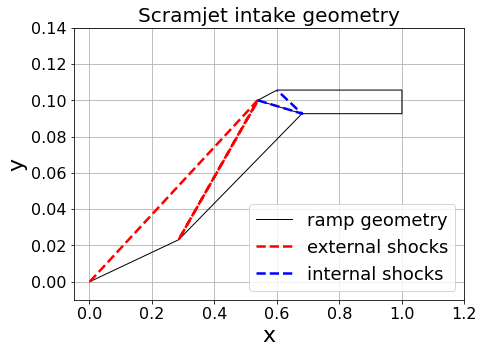

In [8]:
#plotting

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as font_manager

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

import pylab
import numpy as np

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



fname = 'ramp_geo.dat'
ramp_data = np.loadtxt(fname, delimiter = " ", skiprows=0)

fname = 'external_shocks.dat'
ex_shocks = np.loadtxt(fname, delimiter = " ", skiprows=0)

fname = 'internal_shocks.dat'
in_shocks = np.loadtxt(fname, delimiter = " ", skiprows=0)

ramp_x = ramp_data[:,0]
ramp_y = ramp_data[:,1]

ex_shocks_x = ex_shocks[:,0]
ex_shocks_y = ex_shocks[:,1]

in_shocks_x = in_shocks[:,0]
in_shocks_y = in_shocks[:,1]

plt.figure(figsize=(7, 5))

plt.plot(ramp_x,ramp_y,'-k', linewidth=1.0,label='ramp geometry')
plt.plot(ex_shocks_x,ex_shocks_y,'--r', linewidth=2.5,label='external shocks')
plt.plot(in_shocks_x,in_shocks_y,'--b', linewidth=2.5,label='internal shocks')
plt.title('Scramjet intake geometry', fontsize = 20)    
plt.xlabel('x',fontsize=22)
plt.ylabel('y',fontsize=22)
plt.tick_params(labelsize=16)
plt.xlim(-0.05, 1.2)
plt.ylim(-0.01, 0.14)
plt.legend(loc="lower right")
plt.grid(True, which="both", ls="-")

